# Exploratory Visualizations
## Team 5 - Connor, John, Libby, & Natalie
This file contains the code that creates visualizations required for Team Assignment 2: Data Flow Diagrams and Graphics

- 3 univariate charts that explain your response variable and select independent variables used to answer your research question
- 3 bivariate charts that explain your response variable and select independent variables used to answer your research question
- 2 high dimensional charts that explain your response variable and select independent variables to answer your research question
- 2 charts of your choice that you feel describe issues with your data

#### Setup

In [3]:
#install required libraries
%pip install -q pandas matplotlib seaborn numpy
print('Note: you probably dont need to restart the kernel to use the updated packages. ^')

#set working directory for proper import if you clone the git repo
import os 
os.chdir('../')
os.getcwd() #This should output the path to the folder where you cloned the git repo (ex ../DATA422_FALL_2024_TEAM5)

Note: you may need to restart the kernel to use updated packages.
Note: you probably dont need to restart the kernel to use the updated packages. ^


'/Users/mainuser'

In [14]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


#### Import data

In [5]:
building_df = pd.read_csv('/Users/mainuser/Desktop/DATA422_Fall2024_Team5/Data/Seattle Building Energy Benchmarking/2022_Building_Energy_Benchmarking_20240906.csv')


#### Charts

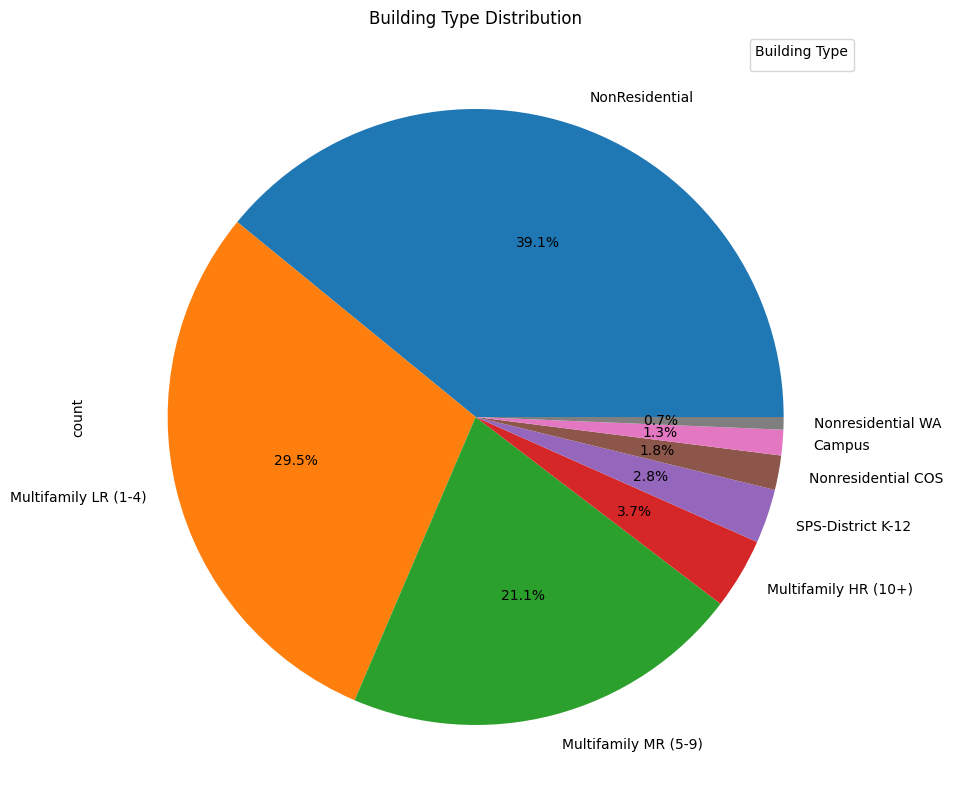

In [12]:
#Pie chart of building types
plt.figure(figsize=(10,10))
plt.title('Building Type Distribution')
building_df['BuildingType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
#plt.savefig('/Documentation/Charts/BuildingTypePieChart.png')

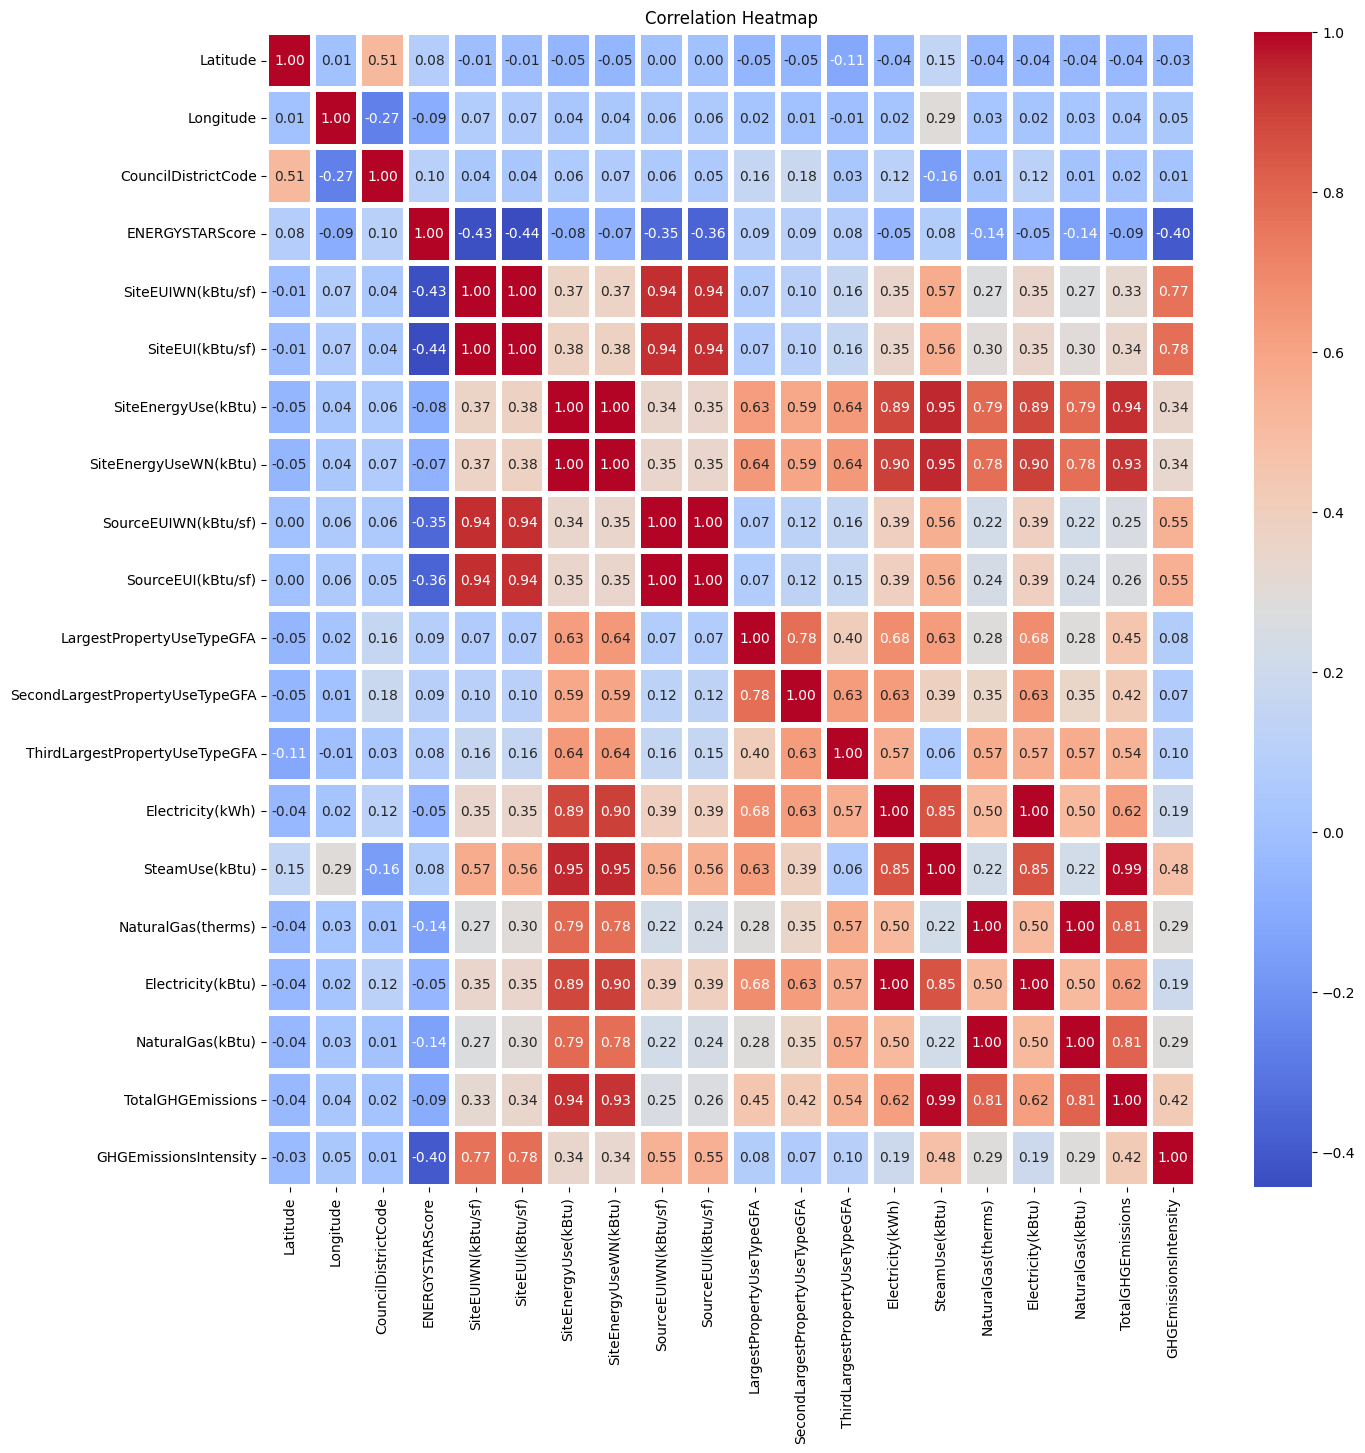

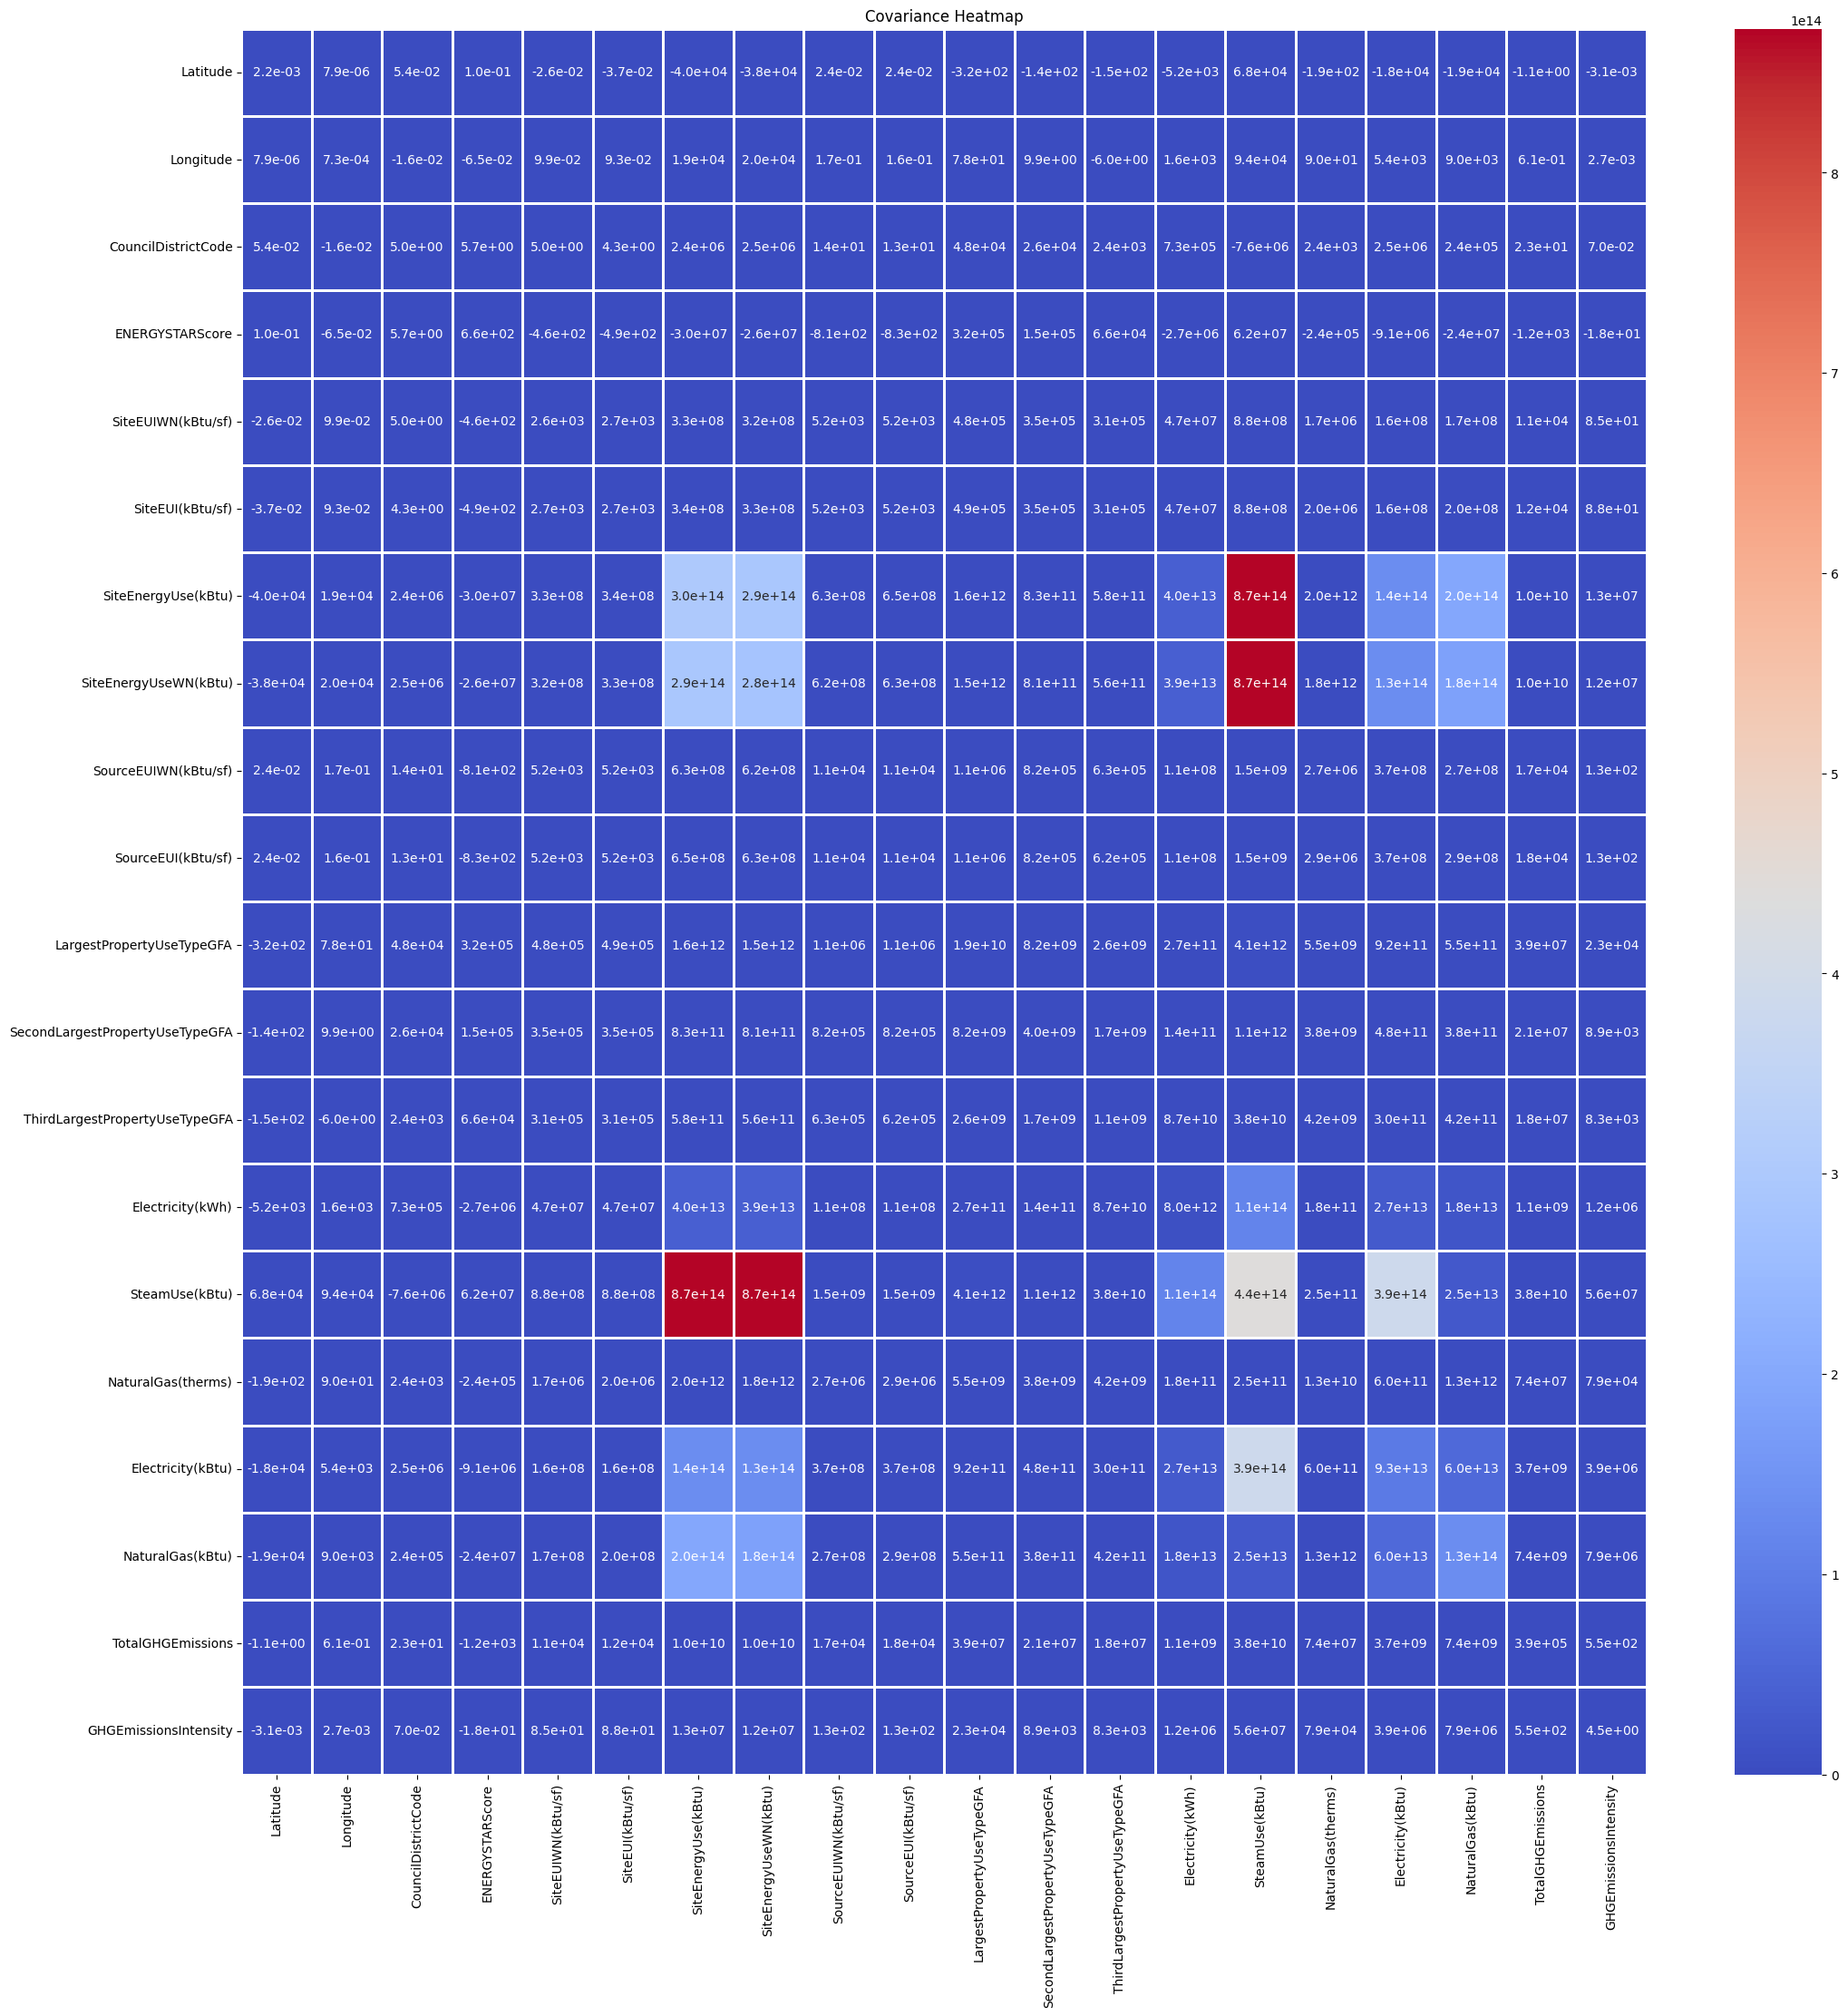

In [8]:
#Correlation and Covariance Heatmaps
corr = building_df.select_dtypes('float64').corr()
cov = building_df.select_dtypes('float64').cov()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 3)
plt.title('Correlation Heatmap')
plt.show()
#plt.savefig('Documentation/Charts/Correlation_Heatmap.png')

plt.figure(figsize = (25, 25))
sns.heatmap(cov, annot = True, cmap = 'coolwarm', fmt = '.1e', linewidths = 2)
plt.title('Covariance Heatmap')
plt.show()
#plt.savefig('Documentation/Charts/Covariance_Heatmap.png')


<Figure size 2000x2000 with 0 Axes>

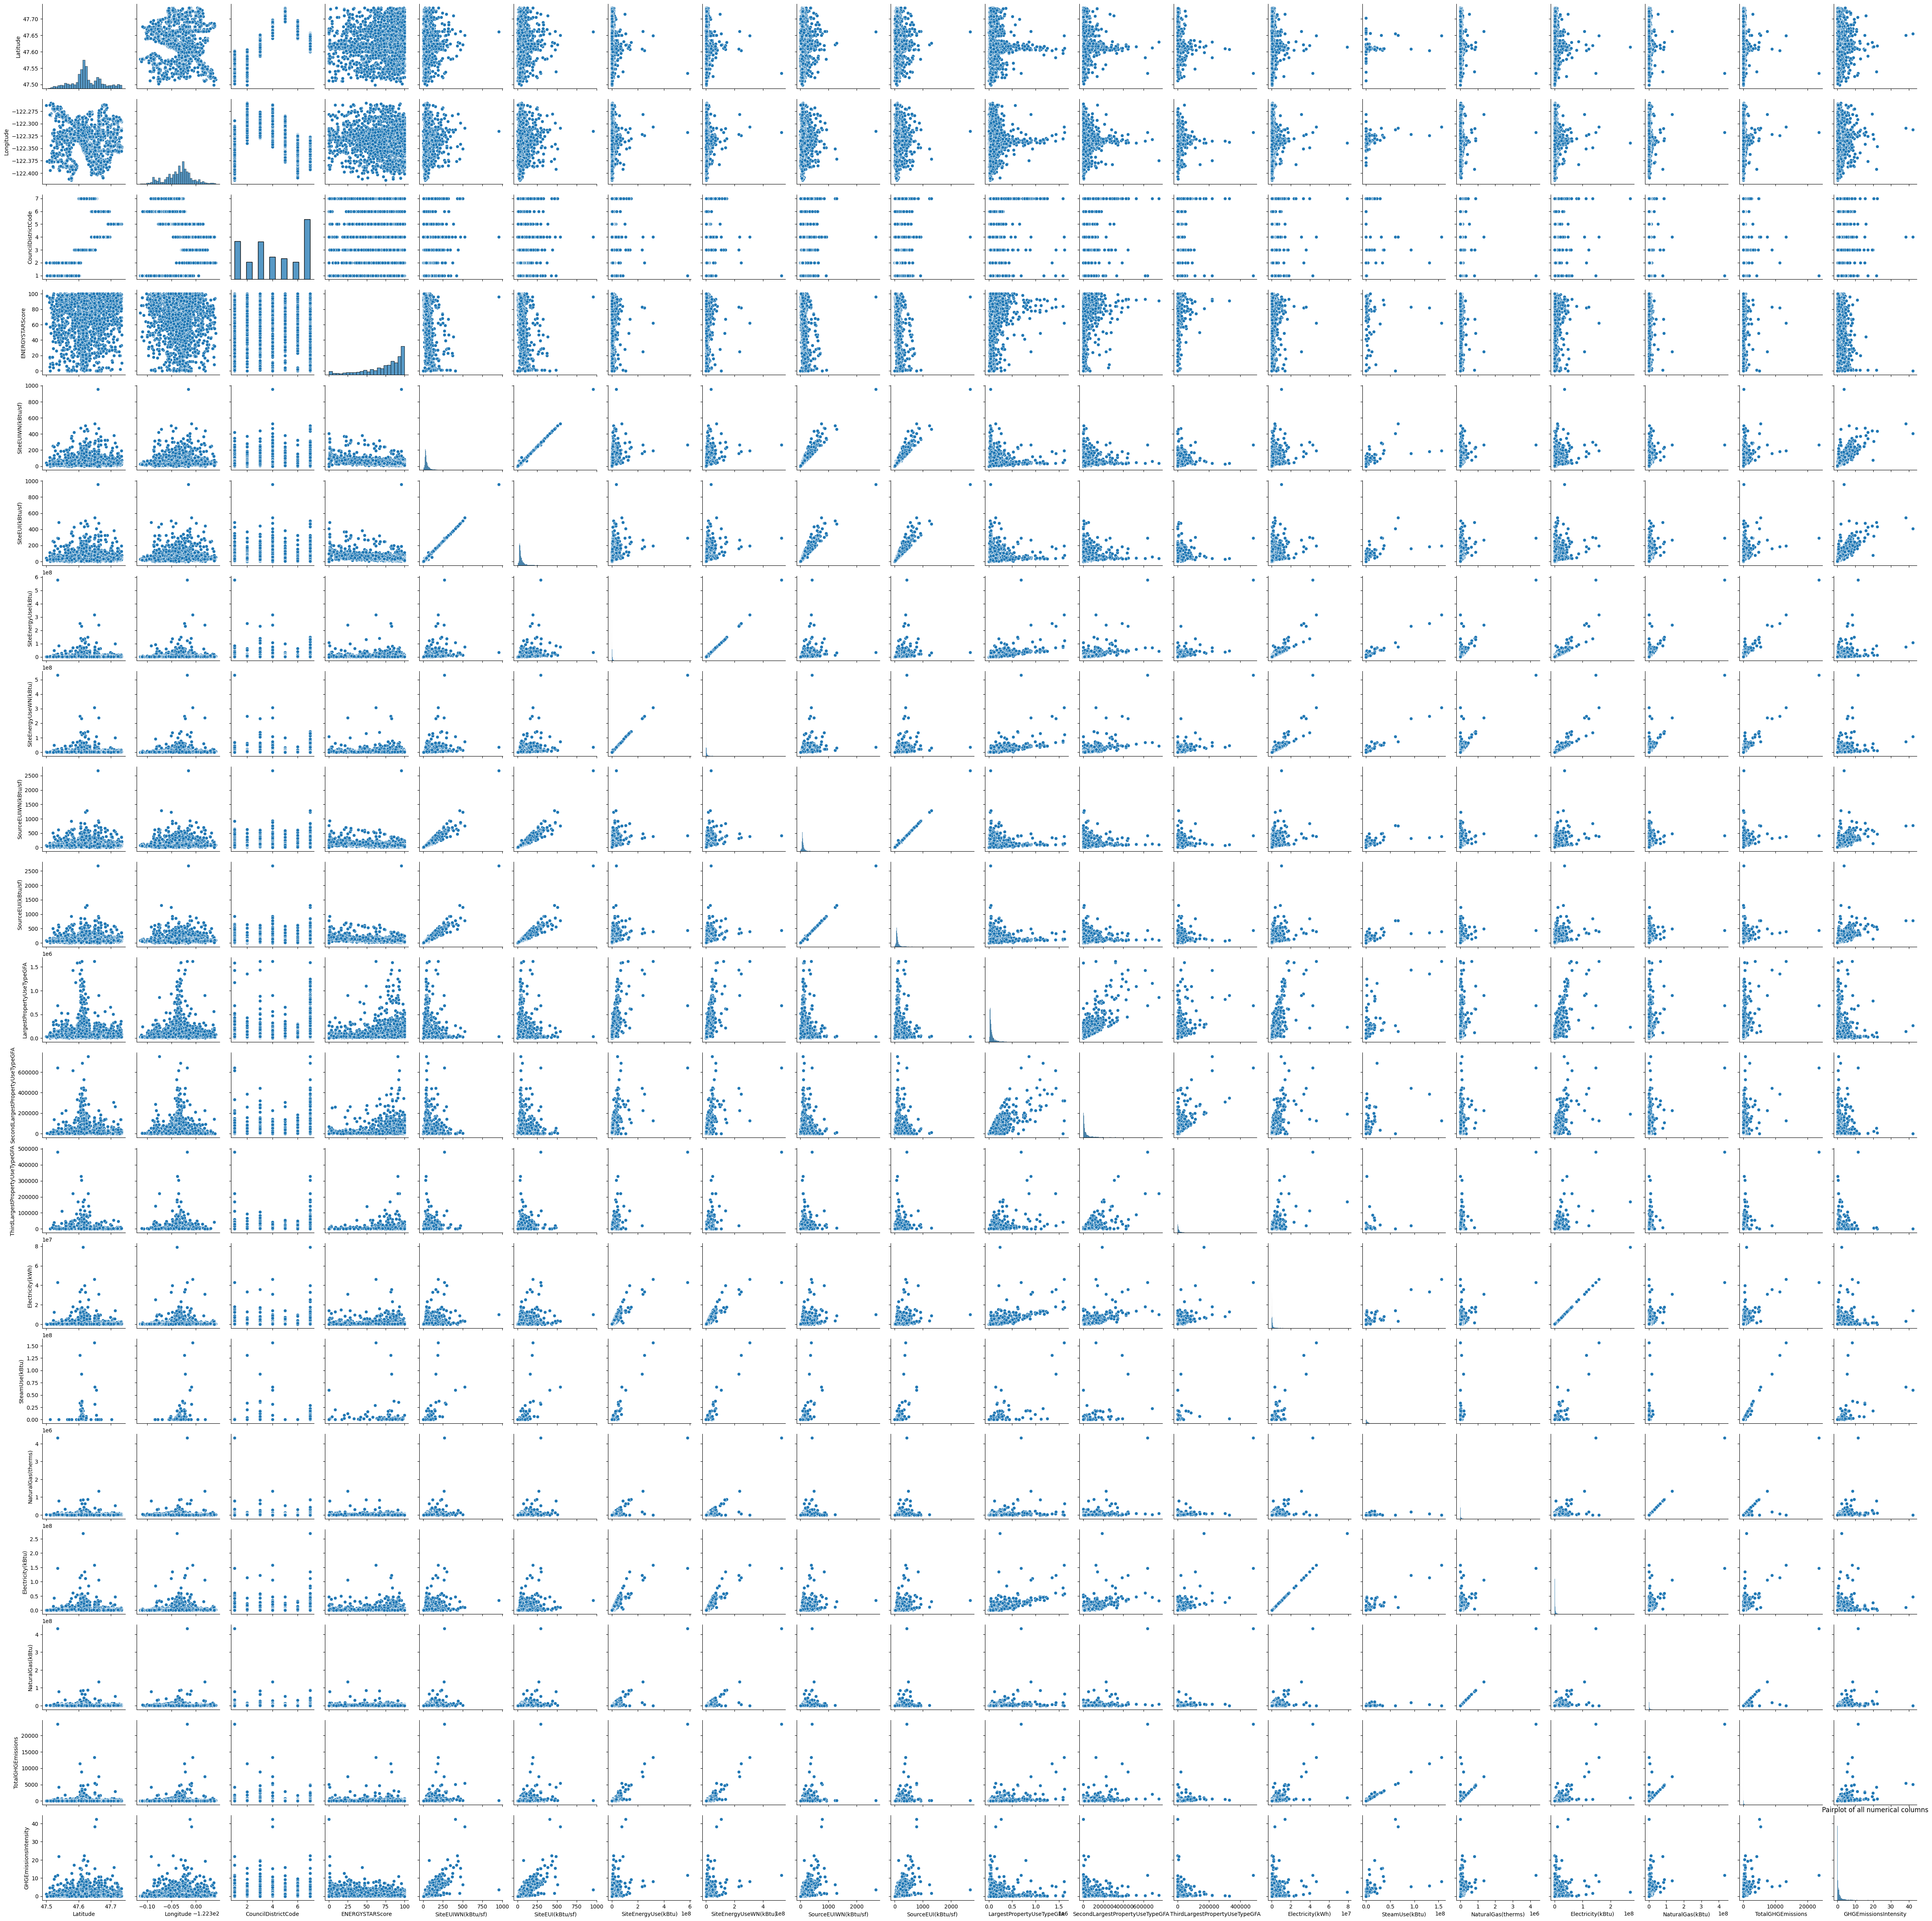

In [ ]:
#pairplot
sns.pairplot(building_df.select_dtypes('float64'))
plt.title('Pairplot of all numerical columns')
plt.show()

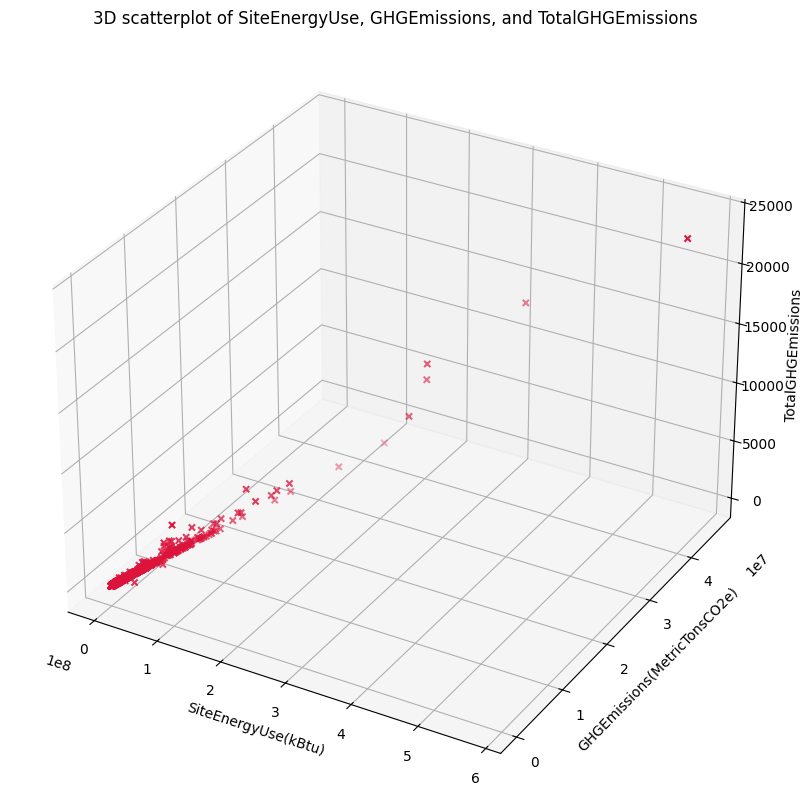

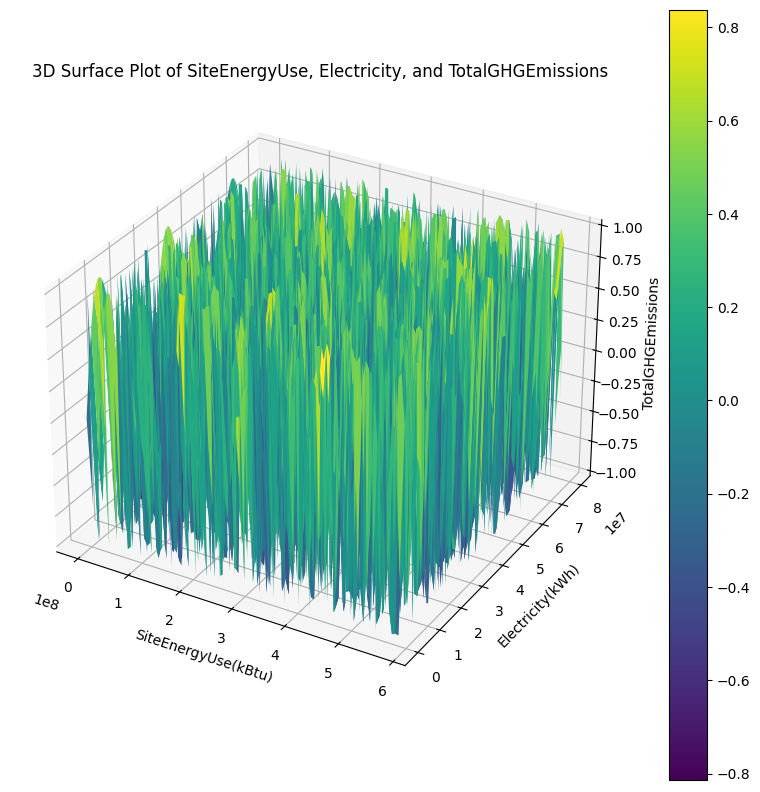

In [15]:
#3d scatter
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize = (10, 10))
ax = figure.add_subplot(111, projection = '3d')
ax.scatter(building_df['SiteEnergyUse(kBtu)'], building_df['Electricity(kWh)'], building_df['TotalGHGEmissions'], c = 'crimson', marker = 'x')
ax.set_xlabel('SiteEnergyUse(kBtu)')
ax.set_ylabel('GHGEmissions(MetricTonsCO2e)')
ax.set_zlabel('TotalGHGEmissions')
ax.set_title('3D scatterplot of SiteEnergyUse, GHGEmissions, and TotalGHGEmissions')

plt.show()



x = np.linspace(building_df['SiteEnergyUse(kBtu)'].min(), building_df['SiteEnergyUse(kBtu)'].max(), 100)
y = np.linspace(building_df['Electricity(kWh)'].min(), building_df['Electricity(kWh)'].max(), 100)
x, y = np.meshgrid(x, y)

# Define a function to compute Z values or use interpolation
# Here, we use a simple example function for demonstration
z = np.sin(np.sqrt(x**2 + y**2))  # Replace this with your actual Z computation

# Create a 3D surface plot
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Add a color bar which maps values to colors
figure.colorbar(surf)

# Labels
ax.set_xlabel('SiteEnergyUse(kBtu)')
ax.set_ylabel('Electricity(kWh)')
ax.set_zlabel('TotalGHGEmissions')
ax.set_title('3D Surface Plot of SiteEnergyUse, Electricity, and TotalGHGEmissions')

plt.show()